In [52]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from scipy.stats import zscore
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [6]:
#1.Data preparation and exploration
#Loading the dataset and making 'STUDENTID' column for unique identification
df = pd.read_csv('C:/Users/DELL/Documents/dataprinciple/student_prediction.csv',index_col='STUDENTID')

In [7]:

df.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
STUDENTID,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


In [8]:
df.shape

(145, 32)

In [9]:
df.size

4640

In [10]:
df.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
AGE,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
GENDER,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
HS_TYPE,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
SCHOLARSHIP,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
WORK,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
ACTIVITY,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
PARTNER,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
SALARY,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
TRANSPORT,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
LIVING,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


In [11]:
df.info(())

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, STUDENT1 to STUDENT145
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AGE            145 non-null    int64
 1   GENDER         145 non-null    int64
 2   HS_TYPE        145 non-null    int64
 3   SCHOLARSHIP    145 non-null    int64
 4   WORK           145 non-null    int64
 5   ACTIVITY       145 non-null    int64
 6   PARTNER        145 non-null    int64
 7   SALARY         145 non-null    int64
 8   TRANSPORT      145 non-null    int64
 9   LIVING         145 non-null    int64
 10  MOTHER_EDU     145 non-null    int64
 11  FATHER_EDU     145 non-null    int64
 12  #_SIBLINGS     145 non-null    int64
 13  KIDS           145 non-null    int64
 14  MOTHER_JOB     145 non-null    int64
 15  FATHER_JOB     145 non-null    int64
 16  STUDY_HRS      145 non-null    int64
 17  READ_FREQ      145 non-null    int64
 18  READ_FREQ_SCI  145 non-null    int64
 19 

In [12]:
#Determines the column's data type 
df.dtypes

AGE              int64
GENDER           int64
HS_TYPE          int64
SCHOLARSHIP      int64
WORK             int64
ACTIVITY         int64
PARTNER          int64
SALARY           int64
TRANSPORT        int64
LIVING           int64
MOTHER_EDU       int64
FATHER_EDU       int64
#_SIBLINGS       int64
KIDS             int64
MOTHER_JOB       int64
FATHER_JOB       int64
STUDY_HRS        int64
READ_FREQ        int64
READ_FREQ_SCI    int64
ATTEND_DEPT      int64
IMPACT           int64
ATTEND           int64
PREP_STUDY       int64
PREP_EXAM        int64
NOTES            int64
LISTENS          int64
LIKES_DISCUSS    int64
CLASSROOM        int64
CUML_GPA         int64
EXP_GPA          int64
COURSE ID        int64
GRADE            int64
dtype: object

In [13]:
#Checking missing values
# Detects the rows with any missing values (NaN)
missing_rows = df[df.isnull().any(axis=1)]

#Counts the number of missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)
# Prints the rows with missing values
print("Rows with missing values:")
print(missing_rows)

AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
IMPACT           0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CLASSROOM        0
CUML_GPA         0
EXP_GPA          0
COURSE ID        0
GRADE            0
dtype: int64
Rows with missing values:
Empty DataFrame
Columns: [AGE, GENDER, HS_TYPE, SCHOLARSHIP, WORK, ACTIVITY, PARTNER, SALARY, TRANSPORT, LIVING, MOTHER_EDU, FATHER_EDU, #_SIBLINGS, KIDS, MOTHER_JOB, FATHER_JOB, STUDY_HRS, READ_FREQ, READ_FREQ_SCI, ATTEND_DEPT, IMPACT, ATTEND, PREP_STUDY, PREP_EXAM, NOTES, LISTENS, LIKES_DISCUSS, CLASSROOM, CUML_GPA, EXP_GPA, COURSE ID, GRADE]
Index:

In [14]:
# checking if the columns contains value zero(Zero value accepted only in GRADE column as it has label encoded 0 representing)
columns_with_zero = df.columns[(df == 0).any()]

# Prints the columns that contains value zero
print("Columns containing the value zero:")
print(columns_with_zero)

Columns containing the value zero:
Index(['GRADE'], dtype='object')


In [15]:
# Checking for any duplicate rows
duplicates = df.duplicated()
print(f"\nNumber of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [16]:
# Calculates the skewness for each column in dataset 
skewness = df.apply(lambda x: skew(x.dropna()))

# Print skewness values
print(skewness)

AGE              0.438885
GENDER          -0.408248
HS_TYPE         -0.049305
SCHOLARSHIP      0.363134
WORK            -0.685274
ACTIVITY        -0.408248
PARTNER         -0.321309
SALARY           1.738578
TRANSPORT        1.536376
LIVING           0.596365
MOTHER_EDU       0.567510
FATHER_EDU       0.193759
#_SIBLINGS       0.302874
KIDS             2.847451
MOTHER_JOB       1.346791
FATHER_JOB      -0.033992
STUDY_HRS        0.894523
READ_FREQ       -0.017031
READ_FREQ_SCI    0.011639
ATTEND_DEPT      1.396191
IMPACT           2.598096
ATTEND           1.208734
PREP_STUDY       1.625122
PREP_EXAM        2.393586
NOTES           -0.756303
LISTENS         -0.065229
LIKES_DISCUSS   -0.436687
CLASSROOM        0.364425
CUML_GPA        -0.079285
EXP_GPA         -0.297291
COURSE ID        0.319566
GRADE            0.386322
dtype: float64


In [17]:
# Applying one-hot encoding to convert into integer
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object', 'category']).columns, drop_first=True)

# Displays the transformed DataFrame
print(df)

            AGE  GENDER  HS_TYPE  SCHOLARSHIP  WORK  ACTIVITY  PARTNER  \
STUDENTID                                                                
STUDENT1      2       2        3            3     1         2        2   
STUDENT2      2       2        3            3     1         2        2   
STUDENT3      2       2        2            3     2         2        2   
STUDENT4      1       1        1            3     1         2        1   
STUDENT5      2       2        1            3     2         2        1   
...         ...     ...      ...          ...   ...       ...      ...   
STUDENT141    2       1        2            3     1         1        2   
STUDENT142    1       1        2            4     2         2        2   
STUDENT143    1       1        1            4     2         2        2   
STUDENT144    2       1        2            4     1         1        1   
STUDENT145    1       1        1            5     2         2        2   

            SALARY  TRANSPORT  LIVING

In [18]:
#Dectecting outliers 
# Implementing outlier detection(Inter-Quartile range (IQR)) based on skewness 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Dictionary to store outliers
outliers = {}

# Detecting and handling outliers for each variable based on skewness
for col in df.columns:
    if skewness[col] > 0:  # Positive skewness (right-skewed)
        upper_bound = Q3[col] + 1.5 * IQR[col]
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else x)
        outliers[col] = df.index[df[col] > upper_bound].tolist()
    elif skewness[col] < 0:  # Negative skewness (left-skewed)
        lower_bound = Q1[col] - 1.5 * IQR[col]
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else x)
        outliers[col] = df.index[df[col] < lower_bound].tolist()


# Prints the detected outliers
print("\nDetected Outliers:")
for col, outlier_indices in outliers.items():
    if len(outlier_indices) > 0:
        print(f"{col}: {outlier_indices}")
    else:
        print(f"{col}: No outliers detected")



Detected Outliers:
AGE: No outliers detected
GENDER: No outliers detected
HS_TYPE: No outliers detected
SCHOLARSHIP: No outliers detected
WORK: No outliers detected
ACTIVITY: No outliers detected
PARTNER: No outliers detected
SALARY: No outliers detected
TRANSPORT: No outliers detected
LIVING: No outliers detected
MOTHER_EDU: No outliers detected
FATHER_EDU: No outliers detected
#_SIBLINGS: No outliers detected
KIDS: No outliers detected
MOTHER_JOB: No outliers detected
FATHER_JOB: No outliers detected
STUDY_HRS: No outliers detected
READ_FREQ: No outliers detected
READ_FREQ_SCI: No outliers detected
ATTEND_DEPT: No outliers detected
IMPACT: No outliers detected
ATTEND: No outliers detected
PREP_STUDY: No outliers detected
PREP_EXAM: No outliers detected
NOTES: No outliers detected
LISTENS: No outliers detected
LIKES_DISCUSS: No outliers detected
CLASSROOM: No outliers detected
CUML_GPA: No outliers detected
EXP_GPA: No outliers detected
COURSE ID: No outliers detected
GRADE: No outli

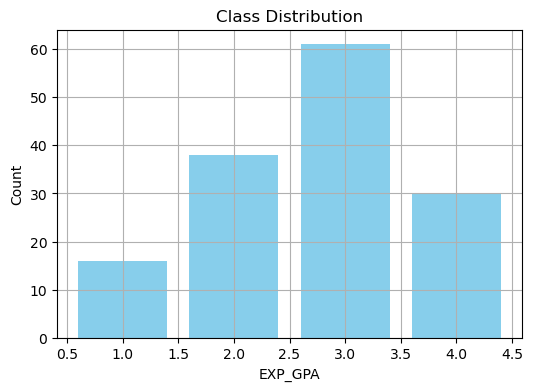

In [19]:
#2.Exploratory data analysis(EDA)
#Univariate Data Analysis

#Visualization of distribution of output(EXP_GPA)
# Counting the occurrence of each class
class_counts = df['EXP_GPA'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('EXP_GPA')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.grid(True)
plt.show()

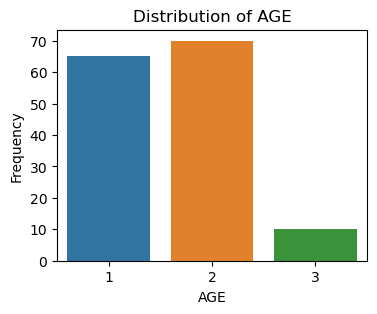

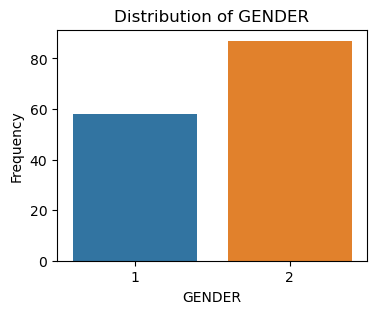

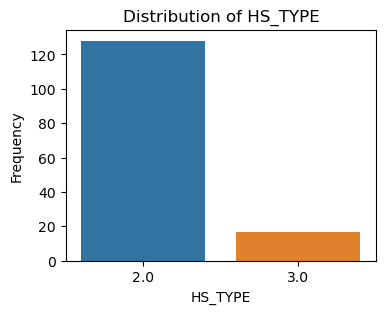

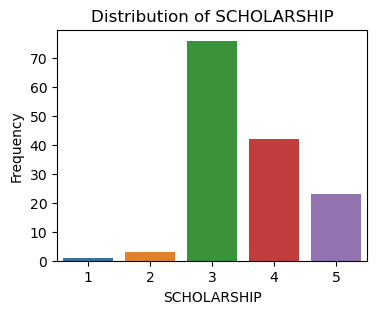

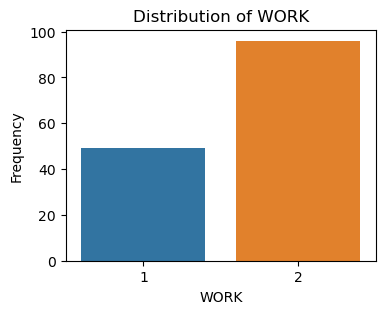

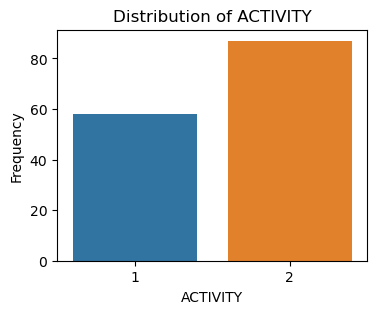

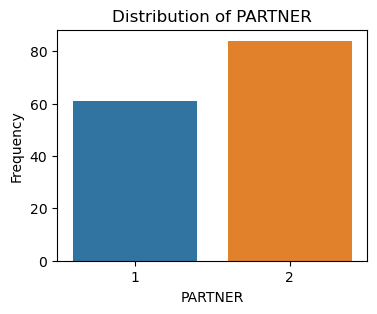

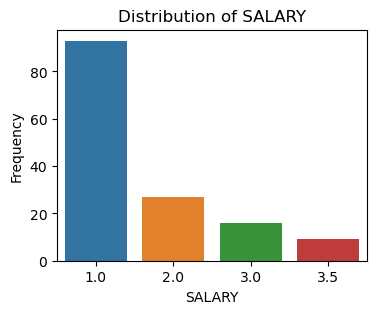

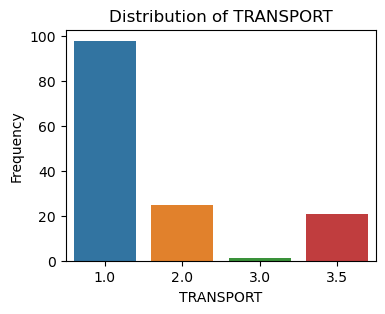

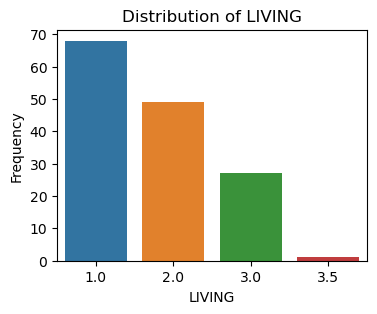

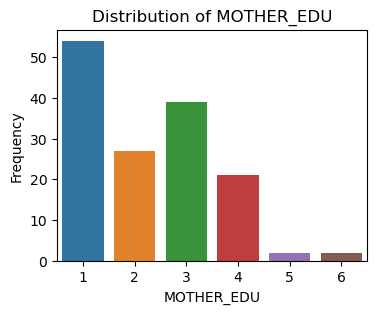

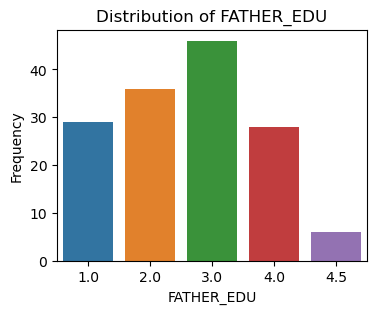

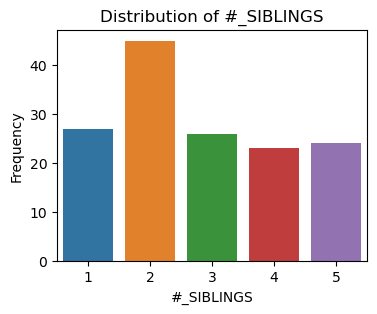

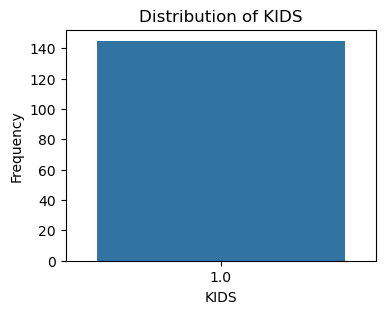

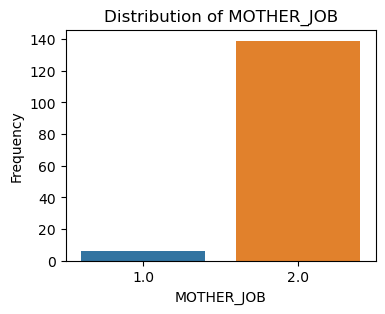

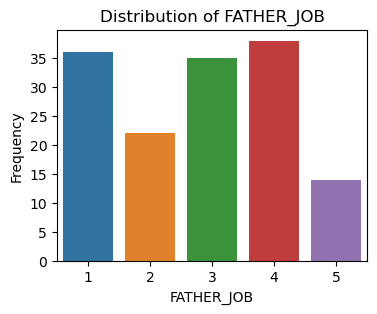

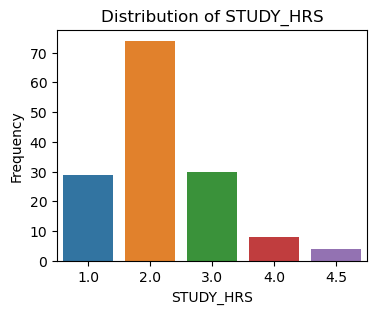

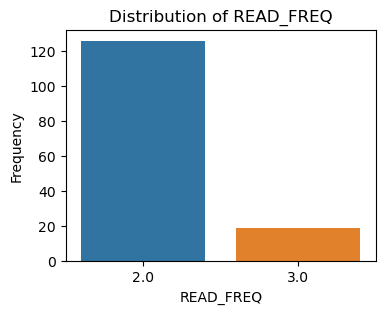

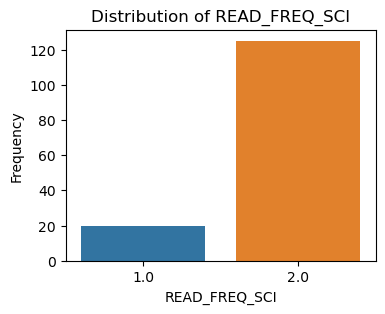

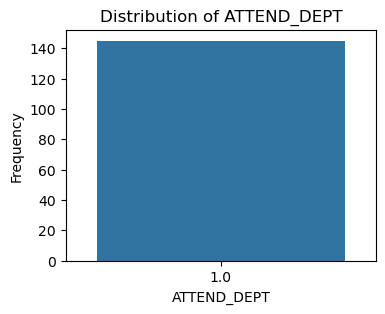

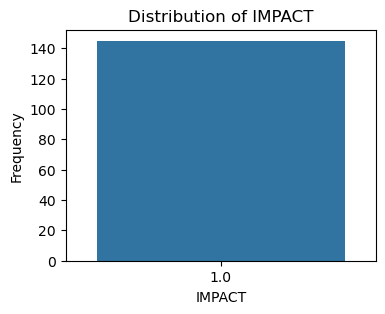

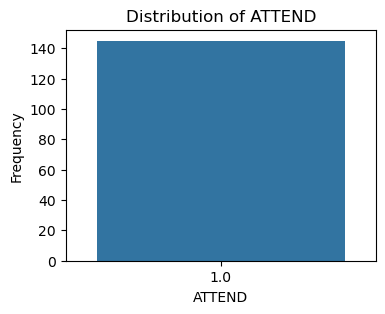

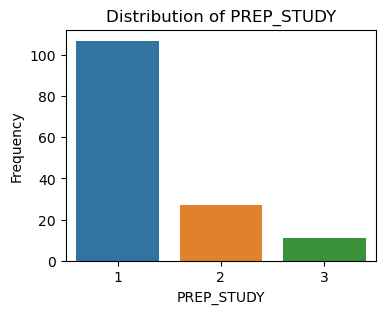

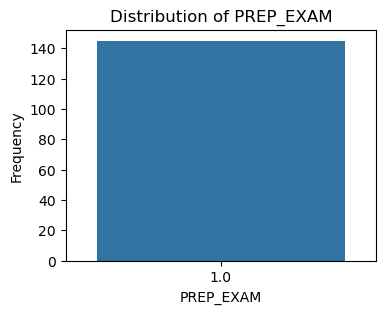

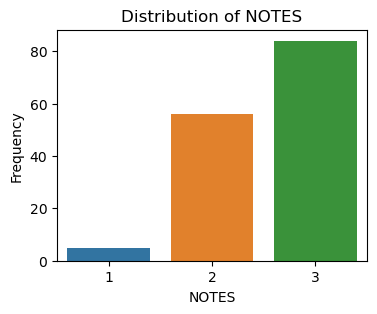

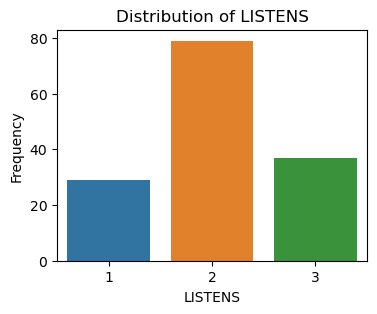

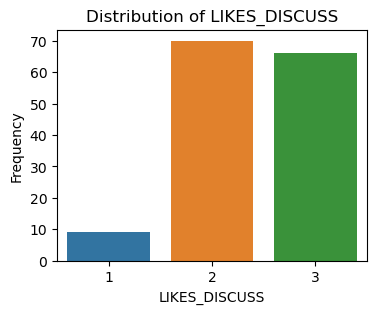

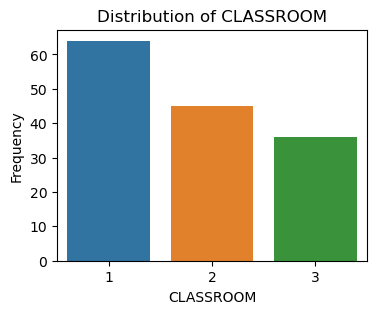

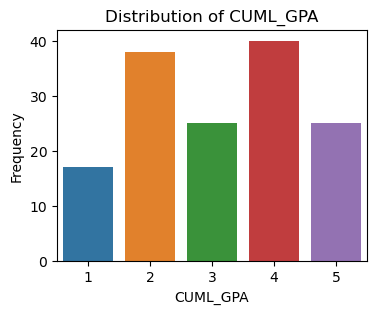

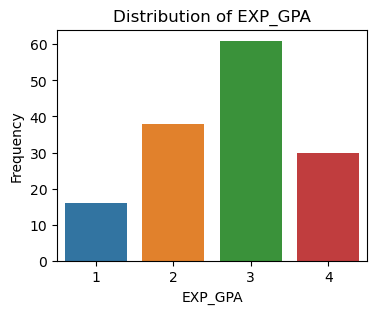

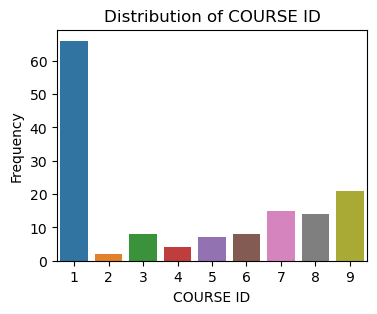

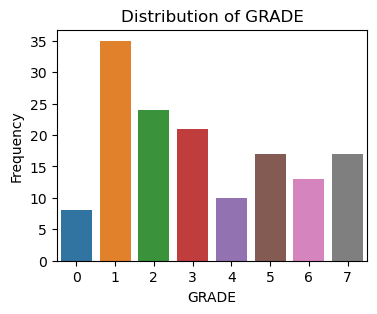

In [20]:
#Univariate analysis
#creating countplot since dataset categorical values are encoded into integer
for col in df.columns:
    plt.figure(figsize=(4, 3))
    if df[col].dtype in ['int64']:
       
        if df[col].nunique() < 10:  
            sns.countplot(x=col, data=df)
        else:
            sns.histplot(df_clean[col], kde=True)
    else:
        sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

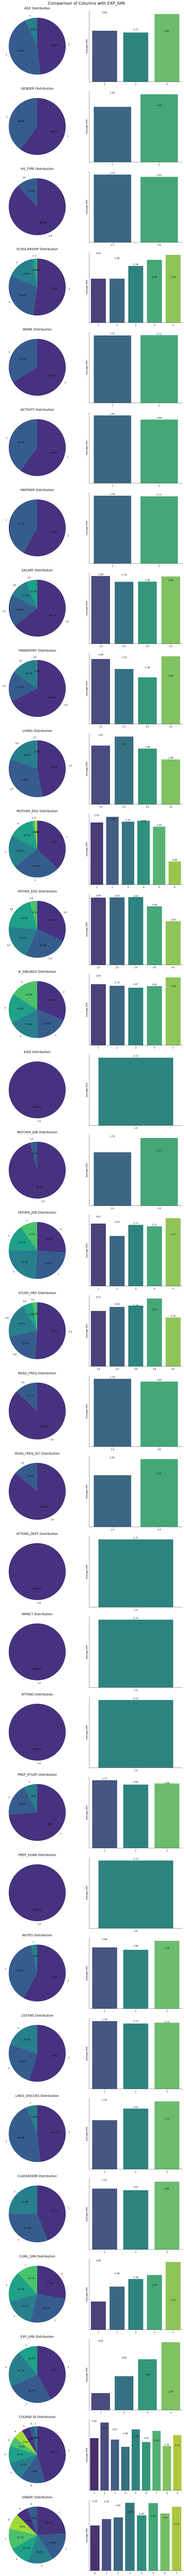

In [21]:
#Bivariate analysis

#pie charts shows the distribution
#bar plots shows the average "EXP_GPA" for each unique value(labels) of all columns 
#comparision with Output (EXP_GRADE)

# Columns for comparing with EXP_GPA
columns_to_compare = df.columns

# Defining color palette for the plots
palette = 'viridis'

# Using Loop through columns for creating visualizations
fig, axs = plt.subplots(nrows=len(columns_to_compare), ncols=2, figsize=(12, len(columns_to_compare) * 5), constrained_layout=True)

for i, col in enumerate(columns_to_compare):
    # plot pie chart of distribution
    data_pie = df[col].value_counts(normalize=True) * 100
    axs[i, 0].pie(data_pie, labels=data_pie.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=sns.color_palette(palette))
    axs[i, 0].set_title(f'{col} Distribution', fontsize=14)
    
    # plots Barplot of Average GPA
    data_bar = df.groupby(col)['EXP_GPA'].mean().sort_values(ascending=False)
    sns.barplot(x=data_bar.index, y=data_bar, ax=axs[i, 1], palette=palette)
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('Average GPA')
    axs[i, 1].set_yticks([]) 
    axs[i, 1].spines['top'].set_visible(False)
    axs[i, 1].spines['right'].set_visible(False)
    # Annotating each bar with its value
    for index, value in enumerate(data_bar):
        axs[i, 1].text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Adjusting overall figure
fig.suptitle('Comparison of Columns with EXP_GPA', fontsize=18)
plt.show()

In [24]:
# Calculates the correlation matrix of columns with 'EXP_OUTPUT'
correlation_matrix = df.corr()
# claculates Correlation with 'EXP_GPA' column
corr_with_EXPgpa = correlation_matrix['EXP_GPA'].drop('EXP_GPA')  

# Printing the correlation values
print("Correlation with 'EXP_GPA' column:")
print(corr_with_EXPgpa)


Correlation with 'EXP_GPA' column:
AGE              0.121441
GENDER           0.292842
HS_TYPE         -0.030755
SCHOLARSHIP      0.243517
WORK             0.007706
ACTIVITY        -0.092476
PARTNER         -0.012658
SALARY          -0.076888
TRANSPORT       -0.008998
LIVING          -0.003877
MOTHER_EDU      -0.072417
FATHER_EDU      -0.175335
#_SIBLINGS       0.085065
KIDS                  NaN
MOTHER_JOB       0.126807
FATHER_JOB       0.064253
STUDY_HRS        0.077233
READ_FREQ       -0.039352
READ_FREQ_SCI    0.251437
ATTEND_DEPT           NaN
IMPACT                NaN
ATTEND                NaN
PREP_STUDY      -0.067562
PREP_EXAM             NaN
NOTES            0.184990
LISTENS         -0.020135
LIKES_DISCUSS    0.234751
CLASSROOM        0.114760
CUML_GPA         0.657853
COURSE ID        0.016830
GRADE            0.248588
Name: EXP_GPA, dtype: float64


In [25]:
#Feature selection 
#keeping top corelated columns
columns_to_keep = ['GENDER', 'CUML_GPA', 'EXP_GPA','LIKES_DISCUSS' ]

# Create a list of columns to drop
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]

# Drop the columns
df_sel = df.drop(columns=columns_to_drop)


In [26]:
df_sel.columns

Index(['GENDER', 'LIKES_DISCUSS', 'CUML_GPA', 'EXP_GPA'], dtype='object')

In [30]:
#corelation with different columns
df_sel_corr=df_sel.corr()
df_sel_corr


,GENDER,LIKES_DISCUSS,CUML_GPA,EXP_GPA
GENDER,1.000000,0.065449,0.241033,0.292842
LIKES_DISCUSS,0.065449,1.000000,0.220125,0.234751
CUML_GPA,0.241033,0.220125,1.000000,0.657853
EXP_GPA,0.292842,0.234751,0.657853,1.000000


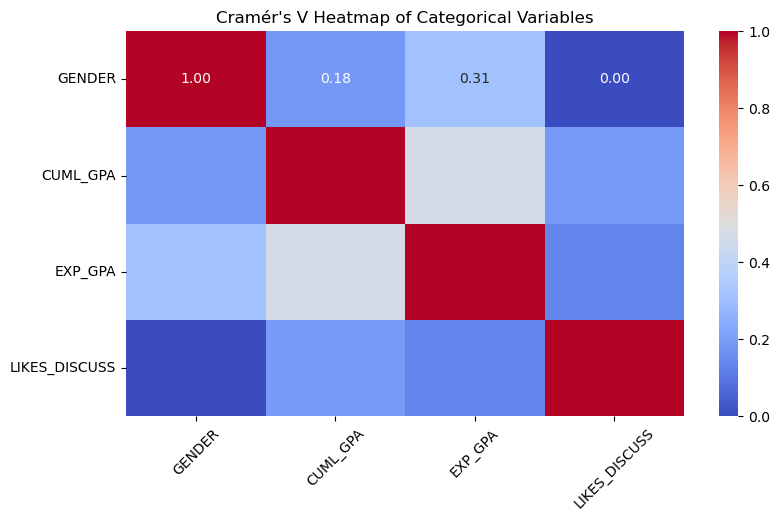

In [31]:
#Creating cramer's v heatmap which shows the visual represenatation of strength of association between categorical pairs 
# Defining Cramer's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculating Cramér's V for each pair of the categorical variables
categorical_columns = ['GENDER', 'CUML_GPA', 'EXP_GPA','LIKES_DISCUSS']
data=df_sel
df_sel = pd.DataFrame(data)

categorical_columns = ['GENDER', 'CUML_GPA', 'EXP_GPA','LIKES_DISCUSS']

cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for i in range(len(categorical_columns)):
    for j in range(i, len(categorical_columns)):
        if i == j:
            cramers_v_matrix.iloc[i, j] = 1.0
        else:
            cramers_v_matrix.iloc[i, j] = cramers_v(df_sel[categorical_columns[i]], df_sel[categorical_columns[j]])
            cramers_v_matrix.iloc[j, i] = cramers_v_matrix.iloc[i, j]

# Converting all entries to float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plots the heatmap
plt.figure(figsize=(9, 5))  # Adjusting the figure size for better visibility
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cramér\'s V Heatmap of Categorical Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Explained variance ratio: [0.48483155 0.23405797 0.19624422 0.08486626]


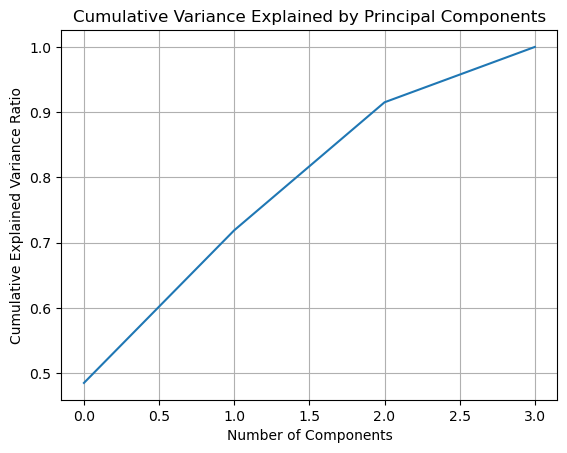

Principal components (eigenvectors): [[-0.37247873 -0.60740131 -0.62244912 -0.32385234]
 [ 0.61321096  0.00479581  0.03884953 -0.78894869]
 [ 0.69334342 -0.39716284 -0.29881307  0.52177325]
 [ 0.0671328   0.68796971 -0.72232857  0.02079199]]


In [39]:
#Applying Principal Component Analysis(PCA) for data simplification
#List of categorical variables based on description
categorical_columns = ['GENDER', 'CUML_GPA', 'EXP_GPA','LIKES_DISCUSS']

# categorical variables
df_categorical = df_sel[categorical_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_categorical)

# Initialize PCA
pca = PCA(n_components=None)  # None means it will keep all components

# Fit PCA
pca.fit(X_scaled)

# Transform data into principal components
X_pca = pca.transform(X_scaled)

# Create a DataFrame for PCA-transformed data
df_clean_pca = pd.DataFrame(X_pca, index=df_sel.index, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Print explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

# Print principal components (eigenvectors)
components = pca.components_
print("Principal components (eigenvectors):", components)

In [71]:
#Using Machine Learning(ML) Model

#Predicting using decision tree method
X = data[['GENDER', 'CUML_GPA','LIKES_DISCUSS']]
y = data['EXP_GPA']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Initializing using decision tree classifier 
clf = DecisionTreeClassifier(random_state=123)

# Fitting the classifier on the training data
clf.fit(X_train, y_train)

# Prediction of output'EXP_GPA' on the test set
y_pred = clf.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Defining the class labels based on the dataset
class_labels = [
    '<2.00',
    '2.00-2.49',
    '2.50-2.99',
    '3.00-3.49',
    'above 3.49'
]

# Generates the confusion matrix with all classes 
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5])

# Converts the confusion matrix to DataFrame for better formatting
cm_df = pd.DataFrame(cm, index=[f'Actual_{label}' for label in class_labels],
                     columns=[f'Predicted_{label}' for label in class_labels])

# Prints the confusion matrix
print("Confusion Matrix Decision Tree:")
print(cm_df)

# Calculates the TP, FP, FN, TN for each class and totals each result
total_TP = total_FP = total_FN = total_TN = 0

for i, label in enumerate(class_labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    total_TP += TP
    total_FP += FP
    total_FN += FN
    total_TN += TN
    
    print(f"\nMetrics for {label}:")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Prints the total metrics
print("\nTotal Metrics:")
print(f"Total True Positives (TP): {total_TP}")
print(f"Total False Positives (FP): {total_FP}")
print(f"Total False Negatives (FN): {total_FN}")
print(f"Total True Negatives (TN): {total_TN}")

# Prints the classification report for precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=class_labels, labels=[1, 2, 3, 4, 5])
print("Classification Report: Decision Tree")
print(report)


Accuracy: 0.79
Confusion Matrix Decision Tree:
                   Predicted_<2.00  Predicted_2.00-2.49  Predicted_2.50-2.99  \
Actual_<2.00                     1                    1                    0   
Actual_2.00-2.49                 0                    4                    1   
Actual_2.50-2.99                 0                    3                    9   
Actual_3.00-3.49                 0                    0                    0   
Actual_above 3.49                0                    0                    0   

                   Predicted_3.00-3.49  Predicted_above 3.49  
Actual_<2.00                         0                     0  
Actual_2.00-2.49                     0                     0  
Actual_2.50-2.99                     1                     0  
Actual_3.00-3.49                     9                     0  
Actual_above 3.49                    0                     0  

Metrics for <2.00:
True Positives (TP): 1
False Positives (FP): 0
False Negatives (FN): 1
Tru

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sk

In [41]:
# USING LOGISTIC REGRESSION
#Defining the x and y labels
x=df_sel[['GENDER', 'CUML_GPA','LIKES_DISCUSS']]
y = df_sel['EXP_GPA']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

# Initializing and training the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Prediction on test data
y_pred = model.predict(x_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72


In [51]:
# Generates the confusion matrix with all classes 
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5])

# Converts the confusion matrix to DataFrame for better formatting
cm_df = pd.DataFrame(cm, index=[f'Actual_{label}' for label in class_labels],
                     columns=[f'Predicted_{label}' for label in class_labels])

# Prints the confusion matrix
print("Confusion Matrix Logistic Regression:")
print(cm_df)

# Calculates the TP, FP, FN, TN for each class and totals each result
total_TP = total_FP = total_FN = total_TN = 0

for i, label in enumerate(class_labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    total_TP += TP
    total_FP += FP
    total_FN += FN
    total_TN += TN
    
    print(f"\nMetrics for {label}:")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Prints the total metrics
print("\nTotal Metrics:")
print(f"Total True Positives (TP): {total_TP}")
print(f"Total False Positives (FP): {total_FP}")
print(f"Total False Negatives (FN): {total_FN}")
print(f"Total True Negatives (TN): {total_TN}")

# Prints the classification report for precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=class_labels, labels=[1, 2, 3, 4, 5])
print("Classification Report: Logistic Regression")
print(report)

Confusion Matrix:
                   Predicted_<2.00  Predicted_2.00-2.49  Predicted_2.50-2.99  \
Actual_<2.00                     0                    2                    0   
Actual_2.00-2.49                 1                    3                    1   
Actual_2.50-2.99                 0                    2                    7   
Actual_3.00-3.49                 0                    0                    0   
Actual_above 3.49                0                    0                    0   

                   Predicted_3.00-3.49  Predicted_above 3.49  
Actual_<2.00                         0                     0  
Actual_2.00-2.49                     0                     0  
Actual_2.50-2.99                     4                     0  
Actual_3.00-3.49                     9                     0  
Actual_above 3.49                    0                     0  

Metrics for <2.00:
True Positives (TP): 0
False Positives (FP): 1
False Negatives (FN): 2
True Negatives (TN): 26

Metrics

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sk

In [72]:
# USING SUPPORT VECTOR METHOD
x = data[['GENDER', 'CUML_GPA','LIKES_DISCUSS']]
y = data['EXP_GPA']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

# Standardizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initializing and training the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(x_train_scaled, y_train)

# Prediction on test data
y_pred = model.predict(x_test_scaled)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generates the confusion matrix with all classes 
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5])

# Converts the confusion matrix to DataFrame for better formatting
cm_df = pd.DataFrame(cm, index=[f'Actual_{label}' for label in class_labels],
                     columns=[f'Predicted_{label}' for label in class_labels])

# Prints the confusion matrix
print("Confusion Matrix Support Vector Method:")
print(cm_df)

# Calculates the TP, FP, FN, TN for each class and totals each result
total_TP = total_FP = total_FN = total_TN = 0

for i, label in enumerate(class_labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    total_TP += TP
    total_FP += FP
    total_FN += FN
    total_TN += TN
    
    print(f"\nMetrics for {label}:")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Prints the total metrics
print("\nTotal Metrics:")
print(f"Total True Positives (TP): {total_TP}")
print(f"Total False Positives (FP): {total_FP}")
print(f"Total False Negatives (FN): {total_FN}")
print(f"Total True Negatives (TN): {total_TN}")

# Prints the classification report for precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=class_labels, labels=[1, 2, 3, 4, 5])
print("Classification Report: Support Vector method")
print(report)

Accuracy: 0.66
Confusion Matrix Support Vector Method:
                   Predicted_<2.00  Predicted_2.00-2.49  Predicted_2.50-2.99  \
Actual_<2.00                     0                    2                    0   
Actual_2.00-2.49                 1                    3                    1   
Actual_2.50-2.99                 0                    2                    7   
Actual_3.00-3.49                 0                    0                    0   
Actual_above 3.49                0                    0                    0   

                   Predicted_3.00-3.49  Predicted_above 3.49  
Actual_<2.00                         0                     0  
Actual_2.00-2.49                     0                     0  
Actual_2.50-2.99                     4                     0  
Actual_3.00-3.49                     9                     0  
Actual_above 3.49                    0                     0  

Metrics for <2.00:
True Positives (TP): 0
False Positives (FP): 1
False Negatives (FN

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sk

In [73]:
# Using Random Forest classifier
X = data[['GENDER', 'CUML_GPA', 'LIKES_DISCUSS']]
y = data['EXP_GPA']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Initializing using random forest classifier
clf = RandomForestClassifier(random_state=123)

# Fitting the classifier on the training data
clf.fit(X_train, y_train)

# Prediction of output 'EXP_GPA' on the test set
y_pred = clf.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Defining the class labels based on the dataset
class_labels = [
    '<2.00',
    '2.00-2.49',
    '2.50-2.99',
    '3.00-3.49',
    'above 3.49'
]

# Generates the confusion matrix with all classes
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5])

# Converts the confusion matrix to DataFrame for better formatting
cm_df = pd.DataFrame(cm, index=[f'Actual_{label}' for label in class_labels],
                     columns=[f'Predicted_{label}' for label in class_labels])

# Prints the confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Calculates the TP, FP, FN, TN for each class and totals each result
total_TP = total_FP = total_FN = total_TN = 0

for i, label in enumerate(class_labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    total_TP += TP
    total_FP += FP
    total_FN += FN
    total_TN += TN
    
    print(f"\nMetrics for {label}:")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Prints the total metrics
print("\nTotal Metrics:")
print(f"Total True Positives (TP): {total_TP}")
print(f"Total False Positives (FP): {total_FP}")
print(f"Total False Negatives (FN): {total_FN}")
print(f"Total True Negatives (TN): {total_TN}")

# Prints the classification report for precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=class_labels, labels=[1, 2, 3, 4, 5])
print("Classification Report: Random Forest")
print(report)

Accuracy: 0.72
Confusion Matrix:
                   Predicted_<2.00  Predicted_2.00-2.49  Predicted_2.50-2.99  \
Actual_<2.00                     1                    0                    1   
Actual_2.00-2.49                 0                    1                    4   
Actual_2.50-2.99                 0                    2                   10   
Actual_3.00-3.49                 0                    0                    0   
Actual_above 3.49                0                    0                    0   

                   Predicted_3.00-3.49  Predicted_above 3.49  
Actual_<2.00                         0                     0  
Actual_2.00-2.49                     0                     0  
Actual_2.50-2.99                     1                     0  
Actual_3.00-3.49                     9                     0  
Actual_above 3.49                    0                     0  

Metrics for <2.00:
True Positives (TP): 1
False Positives (FP): 0
False Negatives (FN): 1
True Negatives (T

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sk

In [68]:
#Using Deep Learning(DL) Model

#USING FeedForward Neural Network(FNN)
# Select the relevant columns
columns_to_keep = ['GENDER', 'CUML_GPA', 'EXP_GPA', 'LIKES_DISCUSS']
data = data[columns_to_keep]

# Ensuring target values are in the expected range (1 to 5)
assert set(data['EXP_GPA'].unique()) <= {1, 2, 3, 4, 5}, "Target values should be in the range 1-5."

# Splittig features and target
X = data.drop(columns=['EXP_GPA'])
y = data['EXP_GPA']

# One-hot encode the categorical features
categorical_features = ['GENDER', 'CUML_GPA', 'LIKES_DISCUSS']
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=43)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining input layer
inputs = Input(shape=(X_train.shape[1],))

# Defining layers
x = Dense(64, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)

# Defining output layer
outputs = Dense(5, activation='softmax')(x)  # 5 units for 5 classes with softmax activation

# Creating the model
model = Model(inputs=inputs, outputs=outputs)

# Compiling the model with sparse categorical crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Trainning the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Makes predictions
predictions = model.predict(X_test)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 197ms/step - accuracy: 0.2422 - loss: 1.5742 - val_accuracy: 0.2917 - val_loss: 1.5181
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4487 - loss: 1.4383 - val_accuracy: 0.2917 - val_loss: 1.4580
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4120 - loss: 1.4125 - val_accuracy: 0.3333 - val_loss: 1.4043
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4010 - loss: 1.3630 - val_accuracy: 0.3333 - val_loss: 1.3591
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5078 - loss: 1.2439 - val_accuracy: 0.3333 - val_loss: 1.3240
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4260 - loss: 1.3010 - val_accuracy: 0.3333 - val_loss: 1.3004
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4789 - loss: 1.1861 - val_accuracy: 0.3333 - val_loss: 1.2823
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4961 - loss: 1.1391 - val_accuracy: 0.3333 - val_loss: 1.2713

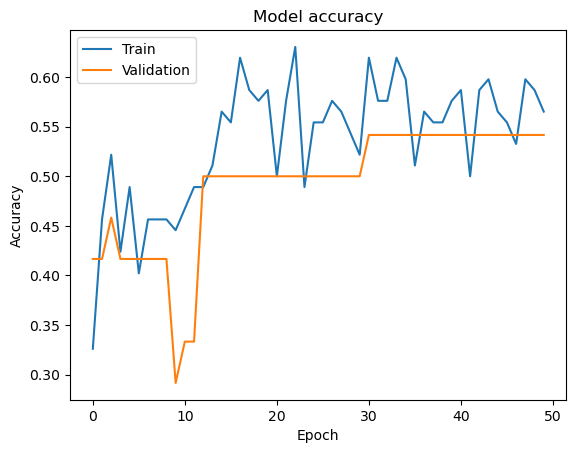

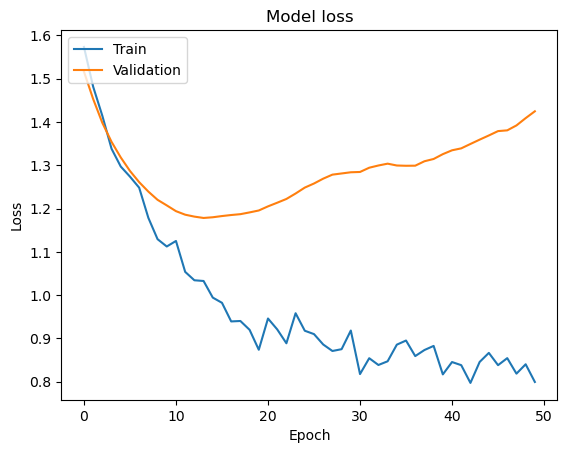

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.33      0.40      0.36         5
           3       0.75      0.69      0.72        13
           4       0.90      1.00      0.95         9

    accuracy                           0.72        29
   macro avg       0.75      0.65      0.67        29
weighted avg       0.74      0.72      0.73        29



In [92]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Convert predictions to class labels
predicted_labels = predictions.argmax(axis=1)

# Print classification report
print(classification_report(y_test, predicted_labels))

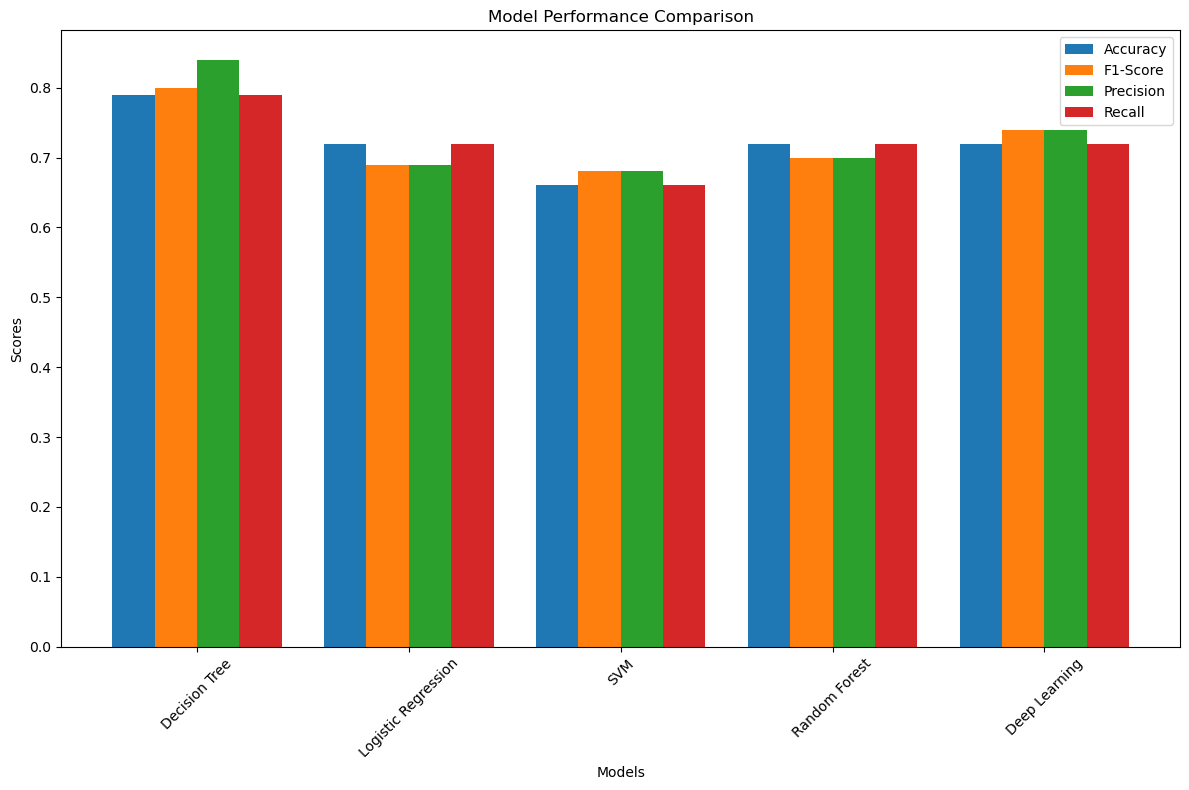

In [78]:
# Comparision of different model on the basis of classification report making bar plot
# Data are taken from classification report of different model
models = ['Decision Tree', 'Logistic Regression', 'SVM', 'Random Forest', 'Deep Learning']
accuracy = [0.79, 0.72, 0.66, 0.72, 0.72]
f1_score = [0.80, 0.69, 0.68, 0.70, 0.74]
precision = [0.84, 0.69, 0.68, 0.70, 0.74]
recall = [0.79, 0.72, 0.66, 0.72, 0.72]

x = np.arange(len(models))  # the label locations

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
opacity = 0.8

rects1 = ax.bar(x - 1.5*bar_width, accuracy, bar_width, label='Accuracy')
rects2 = ax.bar(x - 0.5*bar_width, f1_score, bar_width, label='F1-Score')
rects3 = ax.bar(x + 0.5*bar_width, precision, bar_width, label='Precision')
rects4 = ax.bar(x + 1.5*bar_width, recall, bar_width, label='Recall')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper right')  # Positioning legend to the upper right corner

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()